In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-segmentation/images/2664.png
/kaggle/input/brain-tumor-segmentation/images/2539.png
/kaggle/input/brain-tumor-segmentation/images/1231.png
/kaggle/input/brain-tumor-segmentation/images/1017.png
/kaggle/input/brain-tumor-segmentation/images/2437.png
/kaggle/input/brain-tumor-segmentation/images/2015.png
/kaggle/input/brain-tumor-segmentation/images/2300.png
/kaggle/input/brain-tumor-segmentation/images/2673.png
/kaggle/input/brain-tumor-segmentation/images/2823.png
/kaggle/input/brain-tumor-segmentation/images/1522.png
/kaggle/input/brain-tumor-segmentation/images/2064.png
/kaggle/input/brain-tumor-segmentation/images/641.png
/kaggle/input/brain-tumor-segmentation/images/1088.png
/kaggle/input/brain-tumor-segmentation/images/173.png
/kaggle/input/brain-tumor-segmentation/images/2851.png
/kaggle/input/brain-tumor-segmentation/images/2448.png
/kaggle/input/brain-tumor-segmentation/images/1746.png
/kaggle/input/brain-tumor-segmentation/images/1958.png
/kaggle/inpu

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Conv2DTranspose,concatenate,MaxPooling2D,Dropout
from tensorflow.keras.models import Model
import shutil
IMG_WIDTH=256
IMG_HEIGHT=256
IMG_CHANNELS=3

In [30]:
image=os.listdir('/kaggle/input/brain-mri-data/images')
Masks=os.listdir('/kaggle/input/brain-mri-data/masks')
Original = image
Masks = Masks
print(len(Original))
print(len(Masks))

X=np.zeros((len(Original),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS), dtype=np.float32)
y=np.zeros((len(Masks),IMG_HEIGHT,IMG_WIDTH,1), dtype=np.int32)

3064
3064


In [31]:
print(X.shape)
print(y.shape)

(3064, 256, 256, 3)
(3064, 256, 256, 1)


In [32]:
import cv2
import numpy as np 
for file in Original:
    n=Original.index(file)
    path1=os.path.join('/kaggle/input/brain-tumor-segmentation/images',file)
    print(path1)
    img=cv2.imread(path1)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(256,256))
    try:
        X[n]=img/255
        file2=Masks[n]
        path2=os.path.join('/kaggle/input/brain-tumor-segmentation/masks',file2)
        mask=cv2.imread(path2,cv2.IMREAD_GRAYSCALE)
        mask=cv2.resize(mask,(256,256))
        mask = tf.one_hot(mask, 1, dtype=tf.int32)
        y[n] = mask
    except Exception as e:
        print(e)
        print(path1)

/kaggle/input/brain-tumor-segmentation/images/2664.png
/kaggle/input/brain-tumor-segmentation/images/2539.png
/kaggle/input/brain-tumor-segmentation/images/1231.png
/kaggle/input/brain-tumor-segmentation/images/1017.png
/kaggle/input/brain-tumor-segmentation/images/2437.png
/kaggle/input/brain-tumor-segmentation/images/2015.png
/kaggle/input/brain-tumor-segmentation/images/2300.png
/kaggle/input/brain-tumor-segmentation/images/2673.png
/kaggle/input/brain-tumor-segmentation/images/2823.png
/kaggle/input/brain-tumor-segmentation/images/1522.png
/kaggle/input/brain-tumor-segmentation/images/2064.png
/kaggle/input/brain-tumor-segmentation/images/641.png
/kaggle/input/brain-tumor-segmentation/images/1088.png
/kaggle/input/brain-tumor-segmentation/images/173.png
/kaggle/input/brain-tumor-segmentation/images/2851.png
/kaggle/input/brain-tumor-segmentation/images/2448.png
/kaggle/input/brain-tumor-segmentation/images/1746.png
/kaggle/input/brain-tumor-segmentation/images/1958.png
/kaggle/inpu

Number of images: 3064
Number of masks: 3064


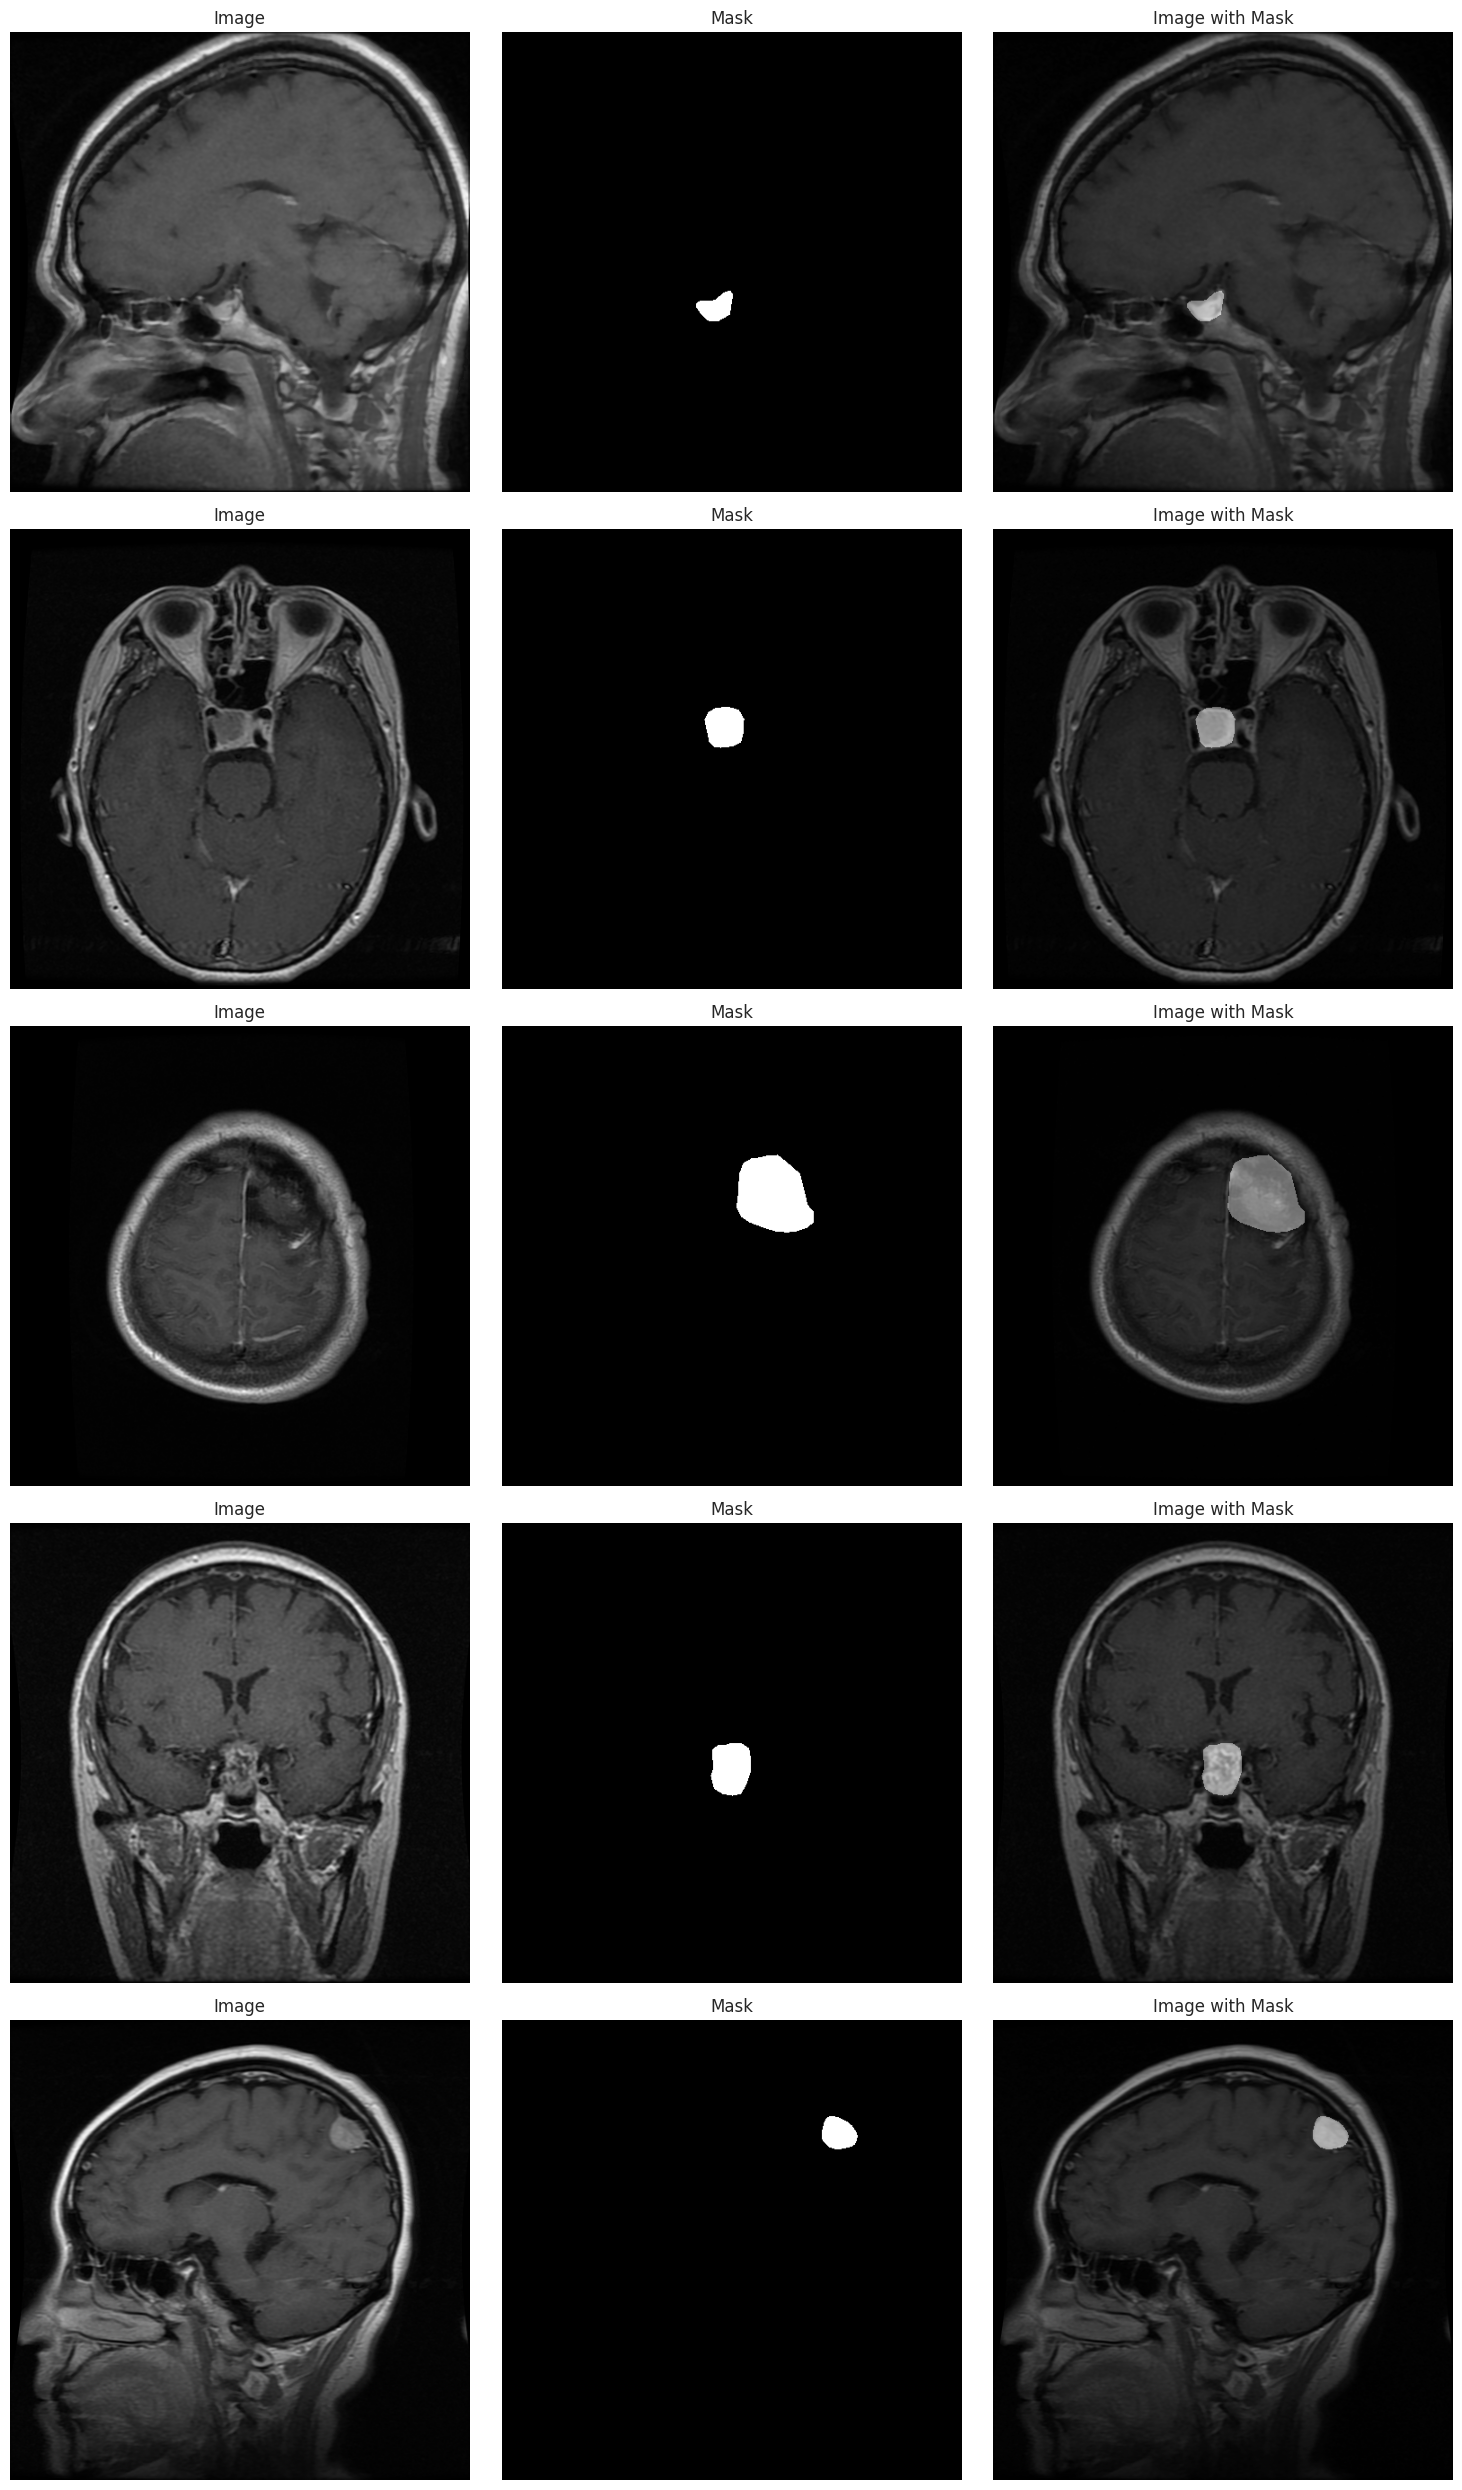

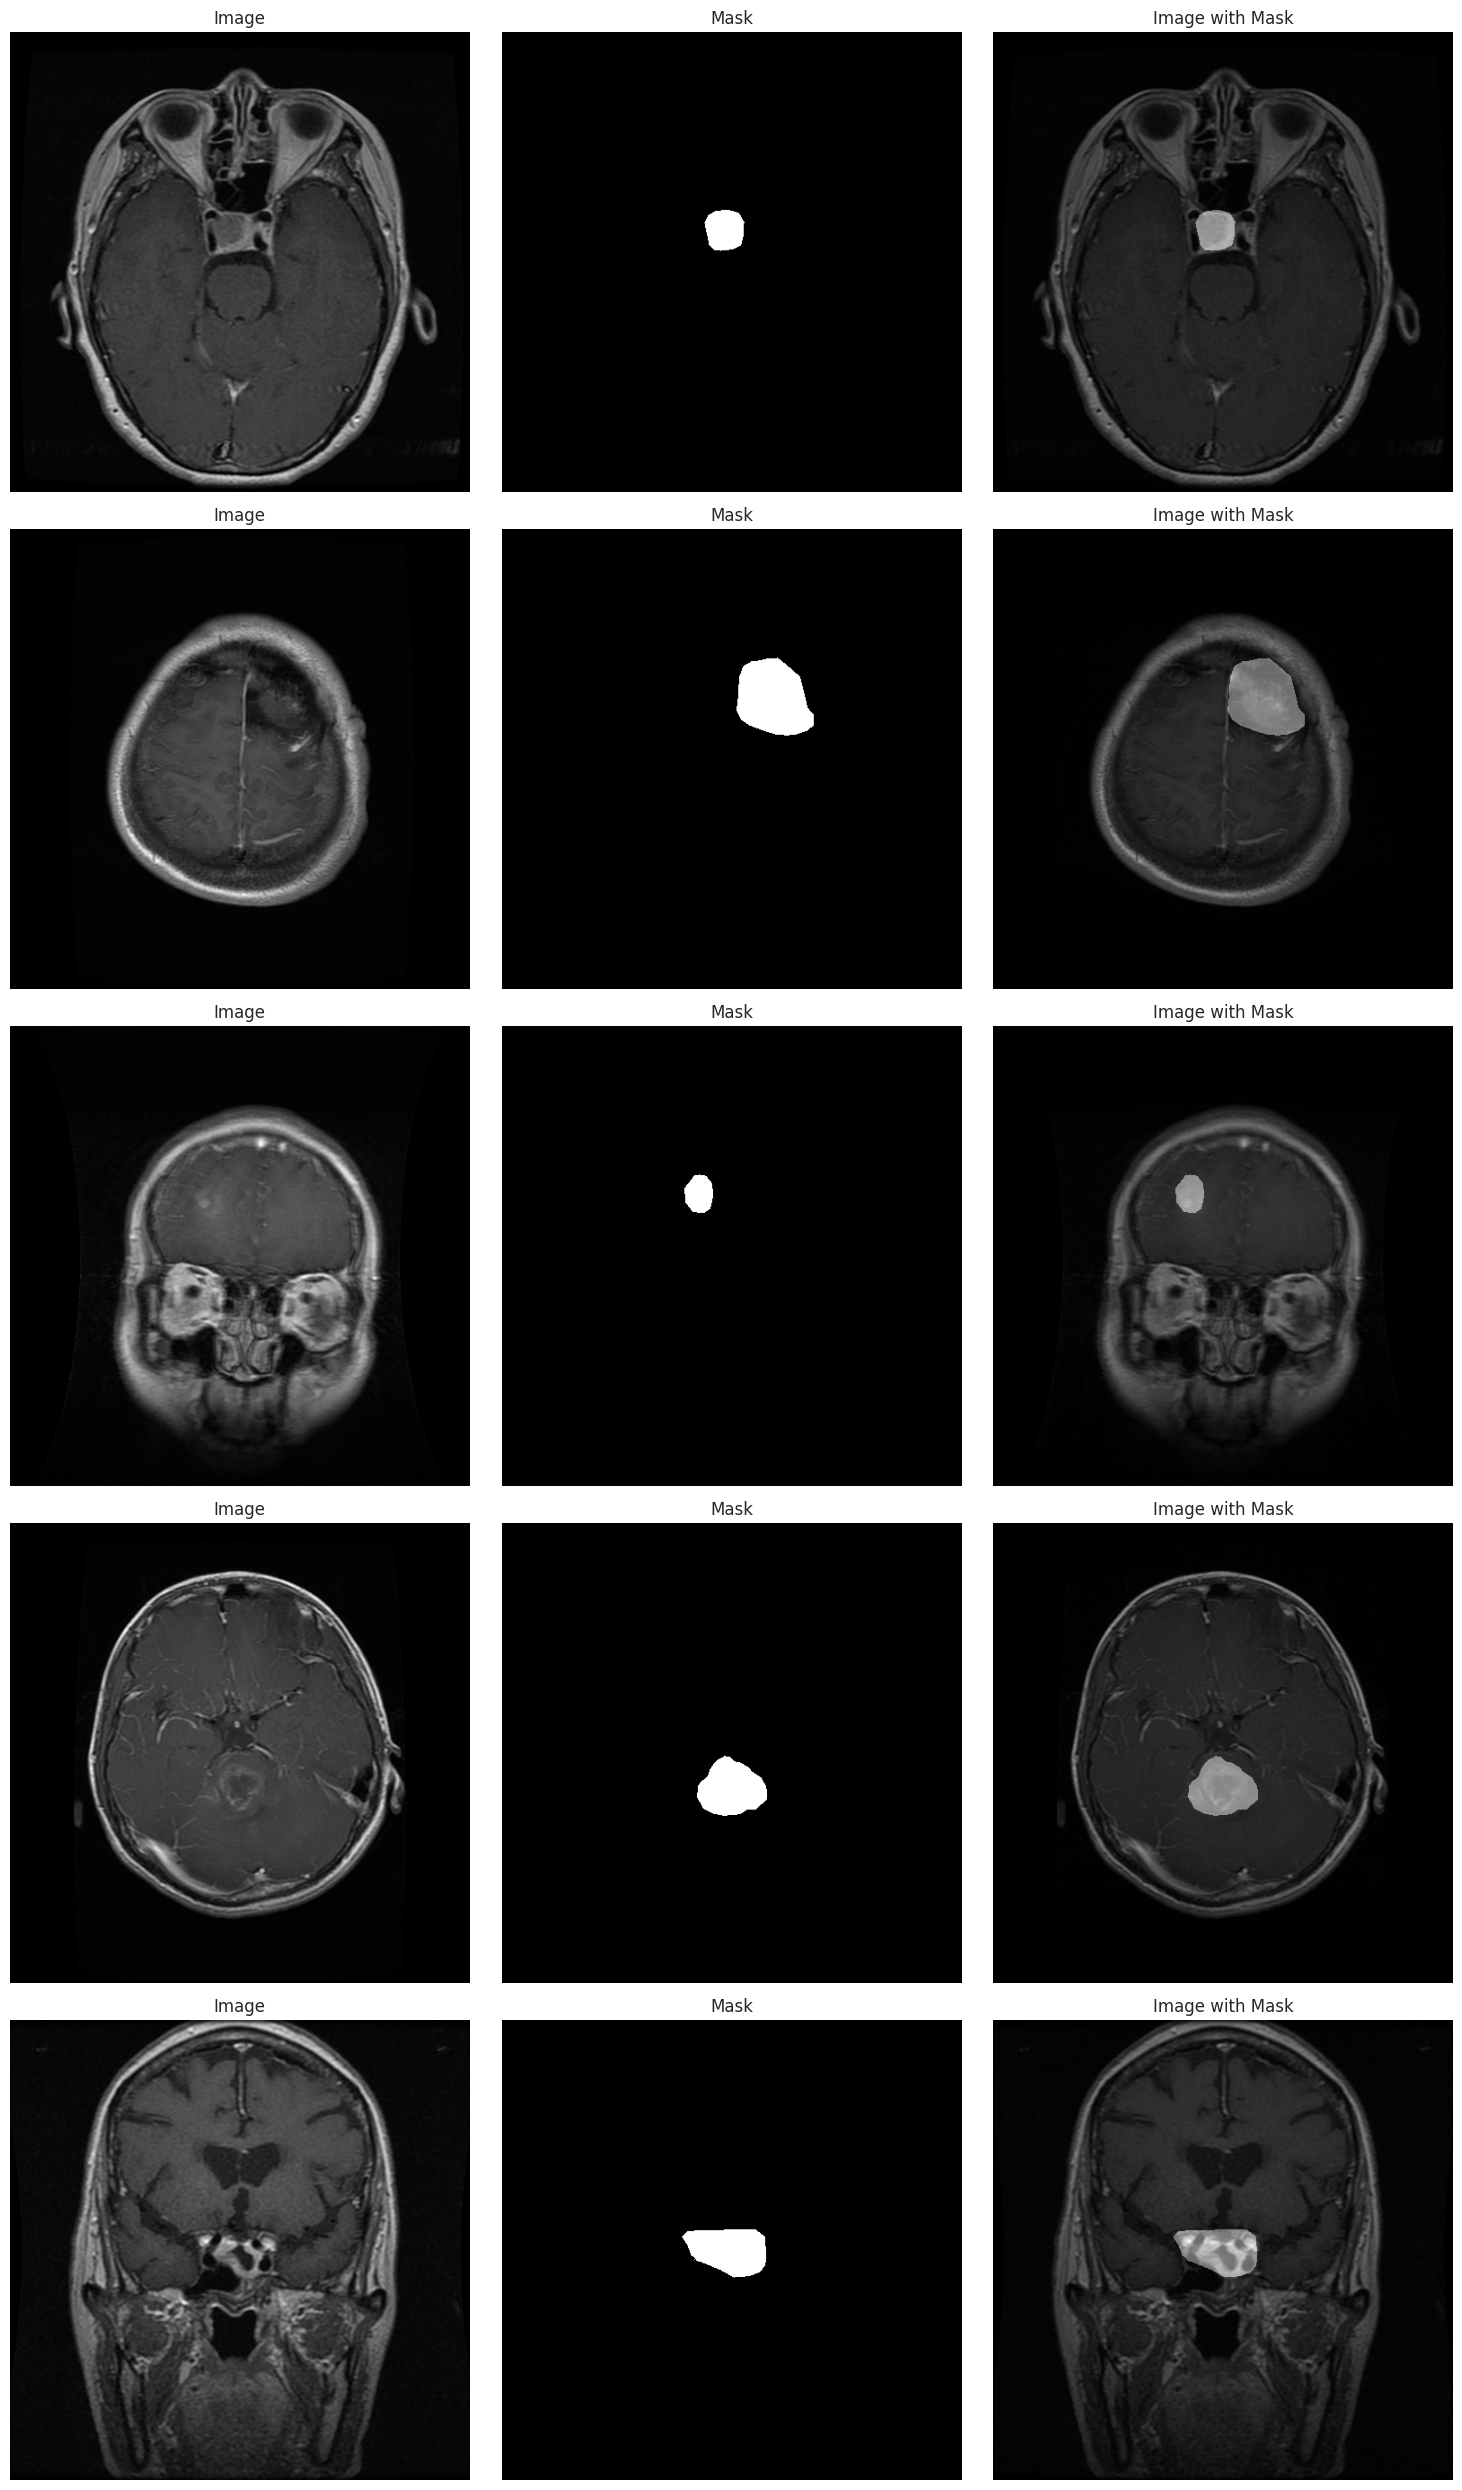

In [39]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image


# Visualization function
def show_data(images, masks, titles):
    fig, axes = plt.subplots(nrows=len(images), ncols=3, figsize=(15, 5 * len(images)))
    for ax, img, mask, title in zip(axes, images, masks, titles):
        if img is not None and mask is not None:
            ax[0].imshow(img)
            ax[0].set_title('Image')
            ax[0].axis('off')
            
            ax[1].imshow(mask, cmap='gray')
            ax[1].set_title('Mask')
            ax[1].axis('off')
            
            ax[2].imshow(img)
            ax[2].imshow(mask, cmap='gray', alpha=0.4)
            ax[2].set_title('Image with Mask')
            ax[2].axis('off')
        else:
            print(f"Skipping invalid image or mask.")
            
    plt.tight_layout()
    plt.show()

# List image and mask files
image_path = '/kaggle/input/brain-mri-data/images'
mask_path = '/kaggle/input/brain-mri-data/masks'

image_files = os.listdir(image_path)
mask_files = os.listdir(mask_path)

# Verify the number of images and masks
print(f"Number of images: {len(image_files)}")
print(f"Number of masks: {len(mask_files)}")

# Function to load images and masks
def load_images_and_masks(image_files, image_path, mask_path, label):
    images = []
    masks = []
    for file in image_files:
        if label in file:
            image_filepath = os.path.join(image_path, file)
            mask_filepath = os.path.join(mask_path, file.replace('.jpg', '_mask.gif'))
            
            # Check if the files exist
            if os.path.exists(image_filepath) and os.path.exists(mask_filepath):
                img = cv2.imread(image_filepath)
                mask = cv2.imread(mask_filepath, cv2.IMREAD_GRAYSCALE)
                
                if img is not None and mask is not None:
                    images.append(img)
                    masks.append(mask)
                else:
                    print(f"Failed to read image or mask: {file}")
            else:
                print(f"File not found: {image_filepath} or {mask_filepath}")
    return images, masks

# Load positive and negative cases
positive_images, positive_masks = load_images_and_masks(image_files, image_path, mask_path, '1')
negative_images, negative_masks = load_images_and_masks(image_files, image_path, mask_path, '0')

# Convert lists to numpy arrays to avoid issues with dtype object
positive_images = np.array(positive_images, dtype=object)
positive_masks = np.array(positive_masks, dtype=object)
negative_images = np.array(negative_images, dtype=object)
negative_masks = np.array(negative_masks, dtype=object)

# Display the data
show_data(positive_images[:5], positive_masks[:5], titles=['Positive'] * 5)
show_data(negative_images[:5], negative_masks[:5], titles=['Negative'] * 5)


In [40]:
images = X

print(images.shape)

(3064, 256, 256, 3)


In [41]:
masks = y
masks.shape

(3064, 256, 256, 1)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(images,masks,test_size=0.2,random_state=42)

In [43]:
inputs=tf.keras.layers.Input((256,256,3))


s = inputs

c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.2)(c1)  # Original 0.1
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)


c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.2)(c2)  # Original 0.1
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     

c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = Dropout(0.3)(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

#Expansive path 

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.2)(c8)  # Original 0.1
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.2)(c9)  # Original 0.1
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
  
     
  
 
outputs = Conv2D(1,(1, 1),activation='sigmoid')(c9)
 
model = Model(inputs=[inputs], outputs=[outputs])

In [44]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 256, 256,  │        448 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 256, 256,  │          0 │ conv2d_19[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 256, 256,  │      2,320 │ dropout_9[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 128, 128,  │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 128, 128,  │      4,640 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 128, 128,  │          0 │ conv2d_21[0][0]   │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 128, 128,  │      9,248 │ dropout_10[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 64, 64,    │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 64, 64,    │     18,496 │ max_pooling2d_5[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64, 64,    │          0 │ conv2d_23[0][0]   │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 64, 64,    │     36,928 │ dropout_11[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 32, 32,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 32, 32,    │     73,856 │ max_pooling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 32, 32,    │          0 │ conv2d_25[0][0]   │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 32, 32,    │    147,584 │ dropout_12[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 16, 16,    │          0 │ conv2d_26[0][0] 

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss='binary_crossentropy', metrics=['accuracy'],
              )

In [46]:
import keras.backend as K

#spe=len(image_generator)//batch_size,
#vs=len(mask_generator)//batch_size,

history=model.fit(X_train, y_train,validation_data = (X_test,y_test),
                  epochs=10,
                  )

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 60s 525ms/step - accuracy: 0.9690 - loss: 0.1667 - val_accuracy: 0.9819 - val_loss: 0.1028
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 271ms/step - accuracy: 0.9823 - loss: 0.0742 - val_accuracy: 0.9819 - val_loss: 0.1024
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 276ms/step - accuracy: 0.9827 - loss: 0.0648 - val_accuracy: 0.9819 - val_loss: 0.0906
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - accuracy: 0.9830 - loss: 0.0577 - val_accuracy: 0.9819 - val_loss: 0.0736
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 270ms/step - accuracy: 0.9825 - loss: 0.0534 - val_accuracy: 0.9819 - val_loss: 0.0728
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 280ms/step - accuracy: 0.9828 - loss: 0.0508 - val_accuracy: 0.9819 - val_loss: 0.0491
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 273ms/step - accuracy: 0.9823 - loss: 0.0474 - val_accuracy: 0.9819 - val_loss: 0.0568
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 269ms/step - accuracy: 0.9820 - loss: 0.0443 - val_accu

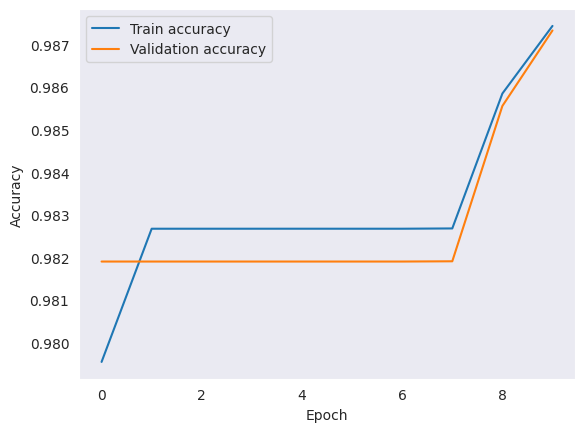

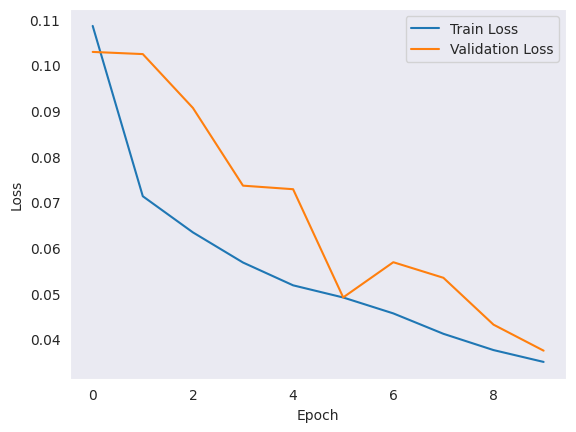

In [47]:
# Plot training history

plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
def predict_image(img_path, mask_path, model):
    H = 256
    W = 256
    num_classes = 1

    img = cv2.imread(img_path)
    img = img[:256, :256, :]
    img = img / 255.0
    img = img.astype(np.float32)

    
    ## Prediction
    pred_mask = model.predict(np.expand_dims(img, axis=0))
    #pred_mask = np.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[0]
    
    
    # calculating IOU score
    inter = np.logical_and(mask, pred_mask)
    union = np.logical_or(mask, pred_mask)

    iou = inter.sum() / union.sum()

    return img, mask, pred_mask, iou

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step


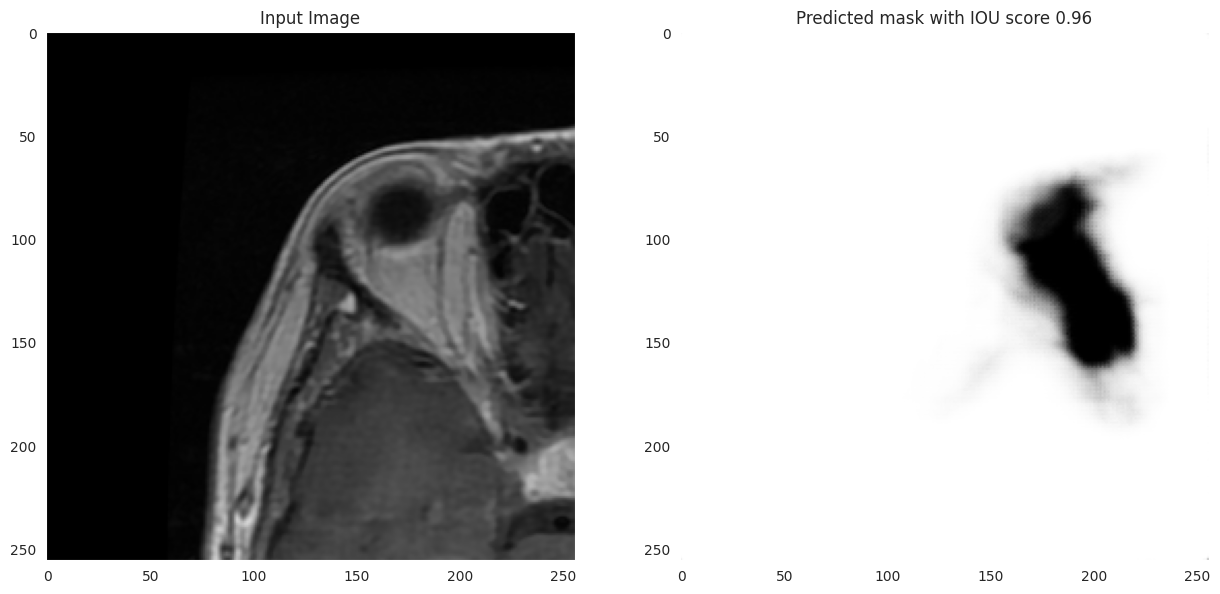

In [49]:
sns.set_style('dark')
img_path = '/kaggle/input/brain-mri-data/images/1005.png'
mask_path = '/kaggle/input/brain-mri-data/masks/1005.png'

img, mask, pred_mask, iou = predict_image(img_path, mask_path, model)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 10))

ax1.set_title("Input Image")
ax1.imshow(img)

ax2.set_title("Predicted mask with IOU score %.2f"%(iou))
ax2.imshow(pred_mask, cmap='gray')

plt.show()